In [7]:
import pandas as pd

In [37]:
df = pd.read_csv("calendar_map_data.csv")
df

,MonthYear,Month,Year,Case Type,NYS Total
0,Jan11,Jan,2011,Low Income,"71,958"
1,Jan11,Jan,2011,TA,"65,859"
2,Jan11,Jan,2011,Total,"137,817"
3,Feb11,Feb,2011,Low Income,"72,627"
4,Feb11,Feb,2011,TA,"65,018"
...,...,...,...,...,...
502,Dec24,Dec,2024,TA,"25,699"
503,Dec24,Dec,2024,Total,"143,561"
504,Jan25,Jan,2025,Low Income,"124,781"
505,Jan25,Jan,2025,TA,"25,968"


In [38]:
df['NYS Total'] = df['NYS Total'].str.replace(',', '').astype(int)
df

,MonthYear,Month,Year,Case Type,NYS Total
0,Jan11,Jan,2011,Low Income,71958
1,Jan11,Jan,2011,TA,65859
2,Jan11,Jan,2011,Total,137817
3,Feb11,Feb,2011,Low Income,72627
4,Feb11,Feb,2011,TA,65018
...,...,...,...,...,...
502,Dec24,Dec,2024,TA,25699
503,Dec24,Dec,2024,Total,143561
504,Jan25,Jan,2025,Low Income,124781
505,Jan25,Jan,2025,TA,25968


In [41]:
df = df[df['Case Type'].str.contains('Total', na=False)]
df = df.drop(columns=['Case Type', 'MonthYear'])
df

,Month,Year,NYS Total
2,Jan,2011,137817
5,Feb,2011,137645
8,Mar,2011,137006
11,Apr,2011,138032
14,May,2011,137550
...,...,...,...
494,Sep,2024,134972
497,Oct,2024,133620
500,Nov,2024,136908
503,Dec,2024,143561


In [42]:
# Find the first index where 'Year' contains 19
first_index = df[df['Year'].astype(str).str.contains('19')].index[0]

# Keep only rows from that index onward
df = df.loc[first_index:]
df

,Month,Year,NYS Total
290,Jan,2019,109487
293,Feb,2019,109034
296,Mar,2019,108030
299,Apr,2019,108707
302,May,2019,107353
...,...,...,...
494,Sep,2024,134972
497,Oct,2024,133620
500,Nov,2024,136908
503,Dec,2024,143561


/var/folders/3t/356b2m1s0713vmrmjlw72vfm0000gn/T/ipykernel_22127/385904082.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = pd.Categorical(df['Month'],
/var/folders/3t/356b2m1s0713vmrmjlw72vfm0000gn/T/ipykernel_22127/385904082.py:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index='Month', columns='Year', values='NYS Total')


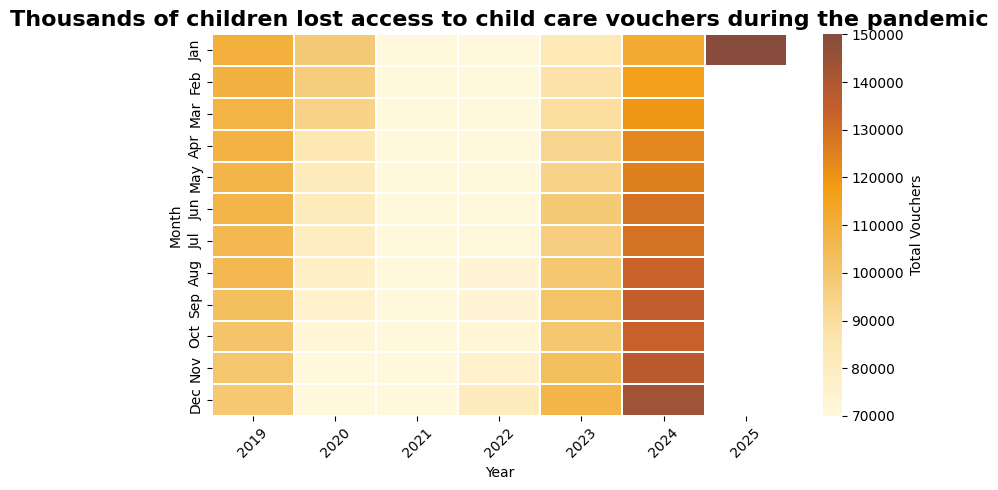

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Set the desired figure dimensions
width = 8  # width in inches
height = 5  # height in inches

# Ensure month order
df['Month'] = pd.Categorical(df['Month'], 
    categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered=True)

# Create continuous colormap matching the colorbar
colors = ['#fff8dc', '#fde6b0', '#f3c164', '#f39c12', '#c65f2c', '#874c3c']
cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)

# Pivot data
heatmap_data = df.pivot_table(index='Month', columns='Year', values='NYS Total')

# Plot heatmap with adjusted figure size
plt.figure(figsize=(width, height))
sns.heatmap(
    heatmap_data,
    cmap=cmap,
    linewidths=0.3,
    vmin=70000,  # fix the min of the scale
    vmax=150000, # fix the max of the scale
    cbar_kws={'label': 'Total Vouchers'}
)

# Styling
plt.title("Thousands of children lost access to child care vouchers during the pandemic", fontsize=16, weight='bold')
plt.xlabel("Year")
plt.ylabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('child_care_vouchers_heatmap.svg', format='svg', bbox_inches='tight')

In [65]:
plt.savefig('child_care_vouchers_heatmap.svg', format='svg', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

/var/folders/3t/356b2m1s0713vmrmjlw72vfm0000gn/T/ipykernel_22127/1992038418.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = pd.Categorical(df['Month'],
/var/folders/3t/356b2m1s0713vmrmjlw72vfm0000gn/T/ipykernel_22127/1992038418.py:21: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index='Month', columns='Year', values='NYS Total')


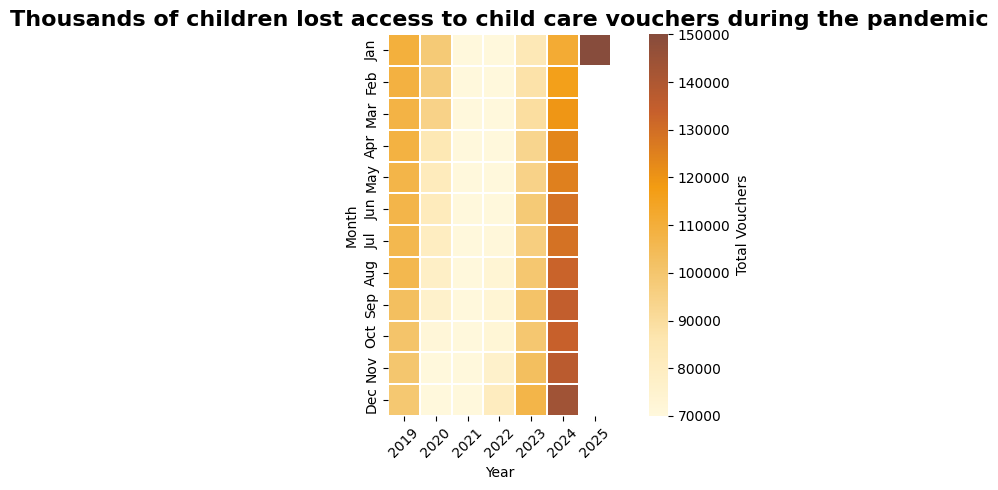

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Set the desired figure dimensions
width = 8  # width in inches
height = 5  # height in inches

# Ensure month order
df['Month'] = pd.Categorical(df['Month'], 
    categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    ordered=True)

# Create continuous colormap matching the colorbar
colors = ['#fff8dc', '#fde6b0', '#f3c164', '#f39c12', '#c65f2c', '#874c3c']
cmap = LinearSegmentedColormap.from_list("custom_gradient", colors)

# Pivot data
heatmap_data = df.pivot_table(index='Month', columns='Year', values='NYS Total')

# Plot heatmap with adjusted figure size
plt.figure(figsize=(width, height))
sns.heatmap(
    heatmap_data,
    cmap=cmap,
    linewidths=0.3,
    square=True,
    vmin=70000,  # fix the min of the scale
    vmax=150000, # fix the max of the scale
    cbar_kws={'label': 'Total Vouchers'}
)

# Styling
plt.title("Thousands of children lost access to child care vouchers during the pandemic", fontsize=16, weight='bold')
plt.xlabel("Year")
plt.ylabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('child_care_vouchers_heatmap_long.svg', format='svg', bbox_inches='tight')